In [1]:
import sys
sys.path.append('/Users/rgao/Documents/Code/research/neurodsp/')

import numpy as np
import scipy as sp
import scipy.io as io
import matplotlib.pyplot as plt
%matplotlib inline

from neurodsp import spectral
import neurodsp as ndsp

### pfc2 data

In [14]:
data = io.loadmat('/Users/rgao/Documents/Data/CRCNS/pfc2/EE.049/lfp_EE049.mat', squeeze_me=True)
lfp = data['data']
fs = data['fs']
t = data['t']
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'data', 'fs', 't'])

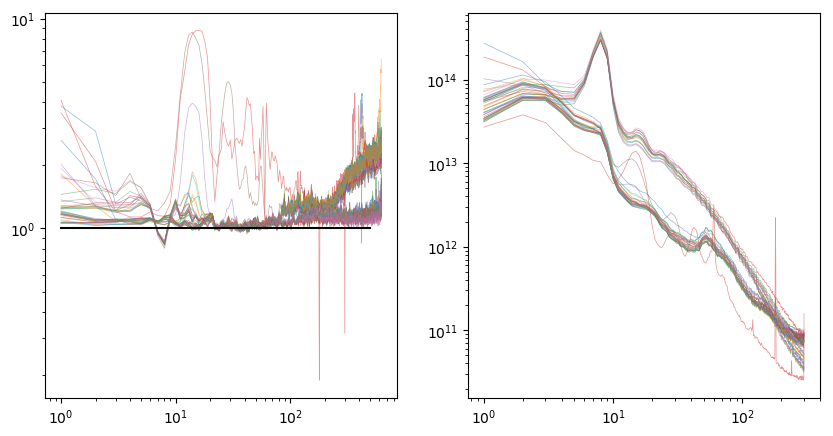

In [26]:
plt.figure(figsize=(10,5))
for chan in range(48):
    f_lfp, scv_lfp = spectral.scv(lfp[chan,:], fs, outlierpct=1.)
    plt.subplot(1,2,1)
    plt.loglog(f_lfp, scv_lfp, alpha=0.5, lw=0.5)

plt.plot([1,500], [1,1], 'k')

plt.subplot(1,2,2)
f_lfp, psd_lfp = spectral.psd(lfp, fs)
plt.loglog(f_lfp[:300],psd_lfp[:48,:300].T, alpha=0.5, lw=0.5);


In [18]:
np.argsort(psd_lfp[:,4])

array([50, 49, 23, 27, 22, 17, 26, 25, 19, 24, 21, 18, 20, 16, 12, 31, 13,
        9, 10, 11,  8, 14, 30, 29, 35, 28, 39,  2,  4,  7,  6,  3,  5, 15,
       34,  1, 42, 45, 38, 41, 47, 44,  0, 46, 43, 33, 37, 40, 32, 36, 48,
       51])

### testing hc2 spiking data with SCV

In [27]:
data = io.loadmat('/Users/rgao/Documents/Data/CRCNS/hc2/Raw/lfp_spiketimes_ec013.527.mat', squeeze_me=True)

In [28]:
data.keys()
lfp = data['data']
spk_fs = data['spk_binrate']
bsp = data['bsp']
fs = data['srate']
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'fnames', 'f', 'T', 'Par', 'srate', 'spksrate', 'data', 'T_shank', 'bsp', 'spk_binrate'])

In [29]:
f_spk, psd_spk = spectral.psd(bsp.T, spk_fs)
f_lfp, psd_lfp = spectral.psd(lfp, fs)
f_spk, scv_spk = spectral.scv(bsp[:,0], spk_fs, outlierpct=2.)
f_lfp, scv_lfp = spectral.scv(lfp[0,:], fs, outlierpct=2.)

/Users/rgao/Documents/Code/research/neurodsp/neurodsp/spectral.py:129: RuntimeWarning: divide by zero encountered in log10
  outlieridx = np.argsort(np.mean(np.log10(spg), axis=0))[:-discard]


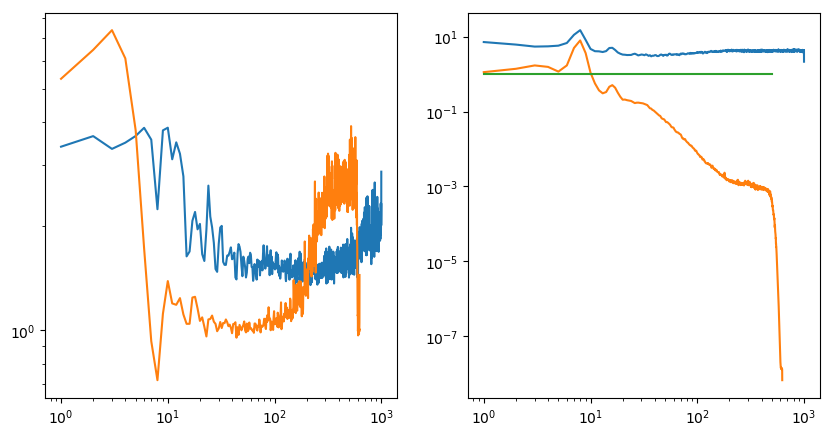

In [30]:
#plt.loglog(f_spk,psd_spk[:,:].T)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.loglog(f_spk,scv_spk)
plt.loglog(f_lfp,scv_lfp)
plt.subplot(1,2,2)
plt.loglog(f_spk,psd_spk[-1,:]*1e5)
plt.loglog(f_lfp,psd_lfp[-1,:]*1e-4)
plt.plot([1,500], [1,1])

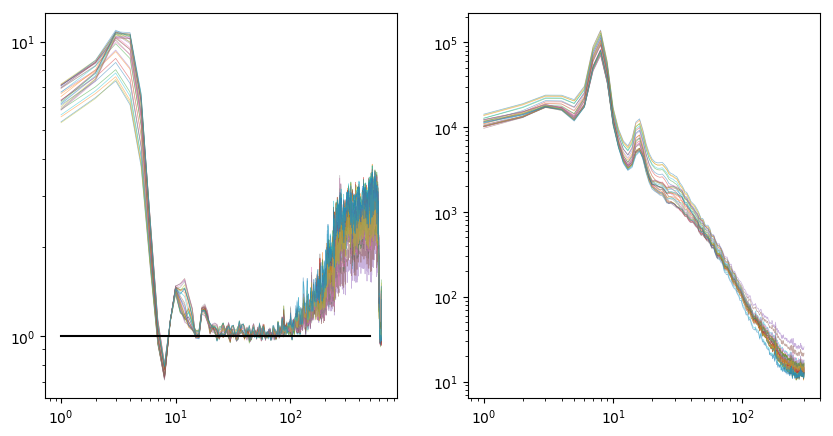

In [31]:
plt.figure(figsize=(10,5))
for chan in range(np.shape(lfp)[0]):
    f_lfp, scv_lfp = spectral.scv(lfp[chan,:], fs, outlierpct=1.)
    plt.subplot(1,2,1)
    plt.loglog(f_lfp, scv_lfp, alpha=0.5, lw=0.5)

plt.plot([1,500], [1,1], 'k')

plt.subplot(1,2,2)
f_lfp, psd_lfp = spectral.psd(lfp, fs)
plt.loglog(f_lfp[:300],psd_lfp[:,:300].T, alpha=0.5, lw=0.5);


In [32]:
S = sp.signal.spectrogram(lfp[0,:], fs, nperseg=int(fs),noverlap=0) # lol it auto-windows here ffs

data:  (1060, 149)
low-d data:  (1060, 2)
PCs: (2, 149)


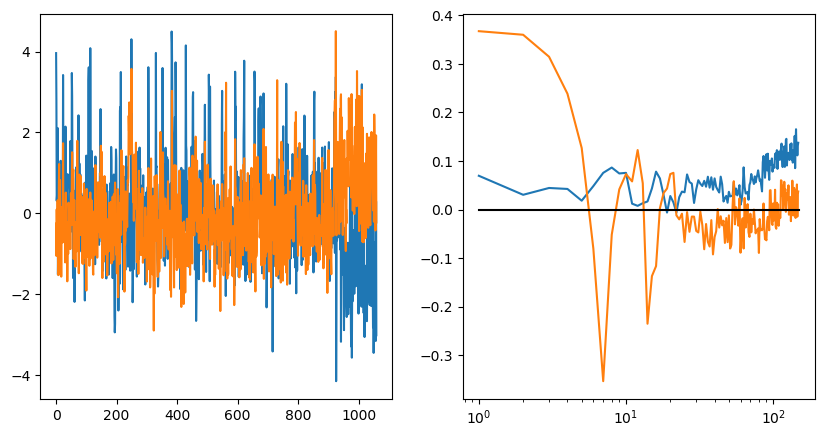

In [74]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, whiten=False)
X = np.log10(S[2])[1:150,:].T
pca.fit(X)
print('data: ', np.shape(X))
print('low-d data: ', np.shape(pca.transform(X)))
print('PCs:', np.shape(pca.components_))

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
X_trans = pca.transform(X)
plt.plot(X_trans)
#plt.plot(pca.transform(X)[:,0],pca.transform(X)[:,1], '.')
#plt.plot(pca.components_.T)
plt.subplot(1,2,2)
plt.semilogx(pca.components_.T);
plt.plot([1,150], [0,0], 'k-')

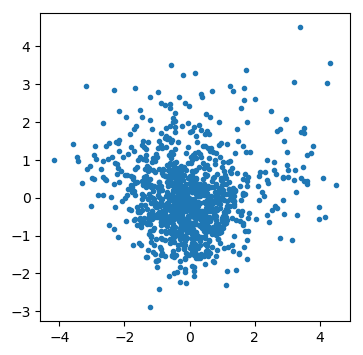

In [75]:
plt.plot(X_trans[:,0],X_trans[:,1],'.')

### testing Carmena monkey data

In [101]:
# import Carmena monkey data
data = io.loadmat('/Users/rgao/Documents/Data/Carmena/020608B/LFP65_128.mat', squeeze_me=True)
LFP = data['LFP']
fs = data['fs']
events = io.loadmat('/Users/rgao/Documents/Data/Carmena/paco020608b_events.mat', squeeze_me=True)

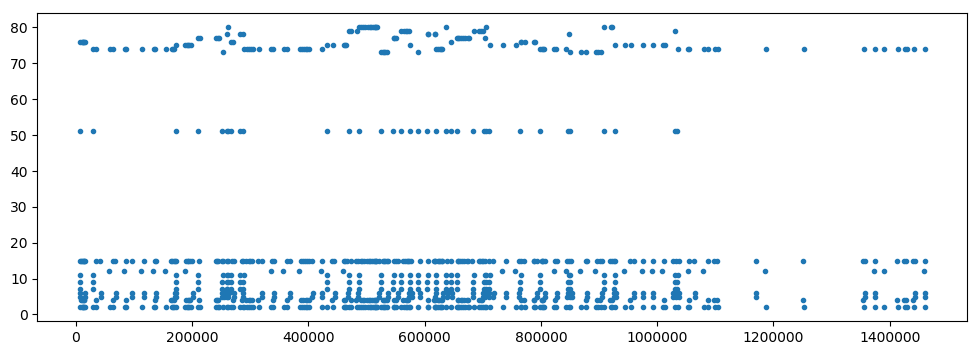

In [102]:
plt.figure(figsize=(12,4))
plt.plot(events['Strobed'][:,0]*1000,events['Strobed'][:,1], '.')

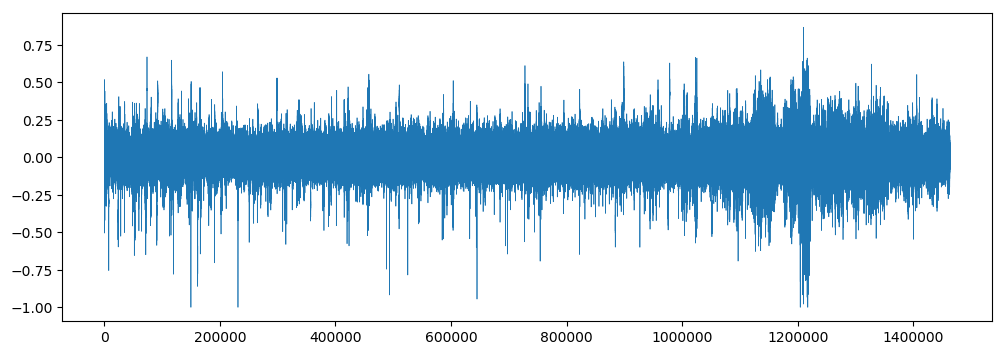

In [103]:
plt.figure(figsize=(12,4))
plt.plot(LFP[:,50], lw=.5)

500

In [124]:
winlen = 1000
numchan=64
psd = np.zeros((int(winlen/2+1), numchan))
scv = np.zeros((int(winlen/2+1), numchan))
for chan in range(numchan):
    lfp_filt = ndsp.filter(LFP[:,chan], fs, 'bandstop', f_lo=59, f_hi=61, iir=True, butterworth_order=3, remove_edge_artifacts=False)
    fpsd, psd[:,chan] = spectral.psd(lfp_filt, fs, nperseg=int(winlen))
    fscv, scv[:,chan] = spectral.scv(lfp_filt, fs, nperseg=int(winlen), outlierpct=2.)
    
#     fpsd, psd[:,chan] = spectral.psd(LFP[:,chan], fs, nperseg=int(winlen))
#     fscv, scv[:,chan] = spectral.scv(LFP[:,chan], fs, nperseg=int(winlen), outlierpct=2.)

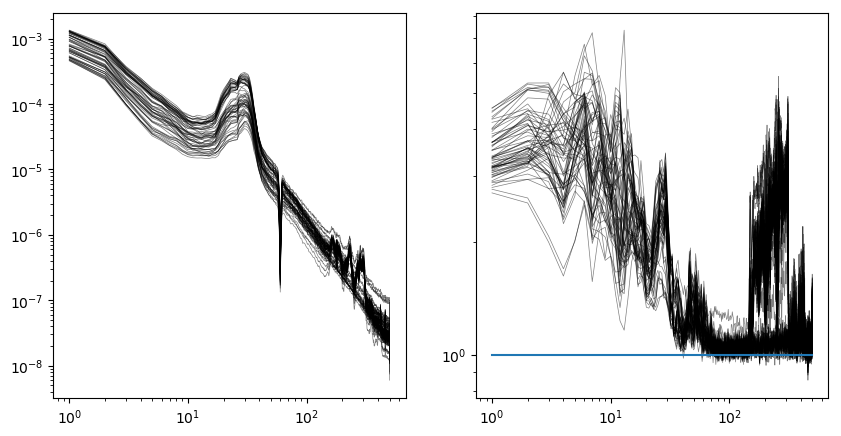

In [125]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.loglog(fpsd,psd, 'k', lw=0.5, alpha=0.5)
plt.subplot(1,2,2)
plt.loglog(fscv,scv, 'k', lw=0.5, alpha=0.5)
plt.plot([1,500], [1,1])

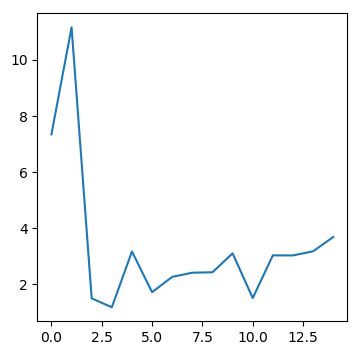

In [91]:
plt.plot(scv[13,49:]);

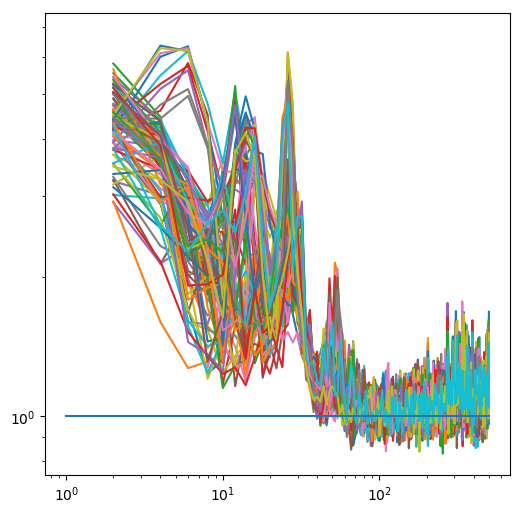

In [80]:
f, T, scv_rs = spectral.scv_rs(LFP[:,10], fs, nperseg=500, noverlap=0)
plt.figure(figsize=(6,6))
plt.loglog(np.arange(0,501,2), scv_rs);
plt.plot([1,500], [1,1])

In [22]:
# trying to recreate Lauren's error
fs=1000.
datapath = '/Users/rgao/Documents/Data/NeuroTycho/Propofol/20120802PF_Anesthesia+and+Sleep_Chibi_Toru+Yanagawa_mat_ECoG128/Session%d/'
tf3 = ep.getTimeFile(datapath, 3)
s3start = int(ep.getStart(tf3,0)*fs)
s3end = int(ep.getEnd(tf3,1)*fs)
data = ep.getECoGdata(datapath, 3, 1)
s3end
spectral.scv(data[s3start:s3end], fs, outlierpct=1.)[1]

# the problem is that s3start is a negative number in the timing file, thus slicing doesnt make sense. 
# need to enforce positivity at the starting index

/Users/rgao/anaconda3/lib/python3.6/site-packages/scipy/signal/spectral.py:1633: UserWarning: nperseg = 1000 is greater than input length  = 0, using nperseg = 0
  .format(nperseg, input_length))


IndexError: tuple index out of range